# Introducción

Este cuaderno hace parte de la prueba técnica en el proceso de selección de Cientifico(a) de Datos del Banco Davivienda.

En la construcción de este cuaderno se tomaró el siguiente referente:

1. [Buitrago (2021)](https://repositorio.unal.edu.co/handle/unal/79630?locale-attribute=en)

# Importar paquetes

In [288]:
# Drive
from google.colab import drive, files
drive.mount('/content/drive')

# Básicos
import numpy as np
import pandas as pd
import datetime
import itertools # Para obtener productos cartesianos
pd.options.display.max_columns = None # Presentación de los dataframes
import re

# Gráficos
!pip install plotly==5.5.0
import plotly.graph_objects as go
import plotly.express as px
import xarray as xr
#
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Tiempo
from datetime import datetime

# Geoespacial
import folium
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim

# Trabajar con R
!pip install rpy2==3.5.1 # Nuevo por surgimiento de error
import rpy2 as rpy2
from rpy2.robjects import r
from rpy2.robjects import numpy2ri
numpy2ri.activate()
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# Importar e instalar paquetes de R
from rpy2.robjects.packages import importr
base = importr('base')
utils = importr('utils')
utils.install_packages('dplyr')
utils.install_packages('ggplot2')
utils.install_packages('gridExtra')
utils.install_packages('ade4')
utils.install_packages('randomForest')
%load_ext rpy2.ipython

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(as ‘lib’ is unspecified)







	‘/tmp/RtmptPGHFp/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmptPGHFp/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmptPGHFp/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmptPGHFp/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmptPGHFp/downloaded_packages’



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Tomar datos

In [289]:
directorio = '/content/drive/MyDrive/Colab Notebooks/TestD'
coord_nom = 'PuntosInteres.csv'
archivo_nom = 'train_precios_vivienda.csv'
# Base de datos
ruta = [directorio, archivo_nom]
ruta = '/'.join(ruta)
datos = pd.read_csv(ruta, delimiter=",")
datos

<ipython-input-289-542f678b02d7>:7: DtypeWarning:

Columns (67,109,110,160,168,169,170,171,178,180) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,municipio_inmueble,barrio,sector,direccion_inmueble_informe,alcantarillado_en_el_sector,acueducto_en_el_sector,gas_en_el_sector,energia_en_el_sector,telefono_en_el_sector,vias_pavimentadas,sardineles_en_las_vias,andenes_en_las_vias,estrato,barrio_legal,topografia_sector,condiciones_salubridad,transporte,demanda_interes,paradero,alumbrado,arborizacion,alamedas,ciclo_rutas,nivel_equipamiento_comercial,descripcion_general_sector,perspectivas_de_valorizacion,actualidad_edificadora,comportamiento_oferta_demanda,alcantarillado_en_el_predio,acueducto_en_el_predio,gas_en_el_predio,energia_en_el_predio,telefono_en_el_predio,tipo_inmueble,descripcion_tipo_inmueble,uso_actual,descripcion_uso_inmueble,clase_inmueble,descripcion_clase_inmueble,ocupante,sometido_a_propiedad_horizontal,altura_permitida,observaciones_altura_permitida,aislamiento_posterior,observaciones_aislamiento_posterior,aislamiento_lateral,observaciones_aislamiento_lateral,antejardin,observaciones_antejardin,indice_ocupacion,observaciones_indice_ocupacion,indice_construccion,observaciones_indice_construccion,predio_subdividido_fisicamente,unidades,contadores_agua,contadores_luz,accesorios,area_valorada,observaciones_generales_inmueble,condicion_ph,numero_piso,numero_de_edificios,area_actividad,uso_principal_ph,rph,porteria,citofono,bicicletero,piscina,tanque_de_agua,club_house,garaje_visitantes,teatrino,sauna,vigilancia_privada,tipo_vigilancia,administracion,vetustez,pisos_bodega,estructura,ajustes_sismoresistentes,cubierta,fachada,tipo_fachada,estructura_reforzada,danos_previos,material_de_construccion,detalle_material,iluminacion,ventilacion,irregularidad_planta,irregularidad_altura,observaciones_estructura,habitaciones,estar_habitacion,cuarto_servicio,closet,sala,comedor,bano_privado,bano_social,bano_servicio,cocina,estudio,balcon,terraza,patio_interior,jardin,zona_de_ropas,zona_verde_privada,local,oficina,bodega,observaciones_dependencias,estado_acabados_pisos,calidad_acabados_pisos,estado_acabados_muros,calidad_acabados_muros,estado_acabados_techos,calidad_acabados_techos,estado_acabados_madera,calidad_acabados_madera,estado_acabados_metal,calidad_acabados_metal,estado_acabados_banos,calidad_acabados_banos,estado_acabados_cocina,calidad_acabados_cocina,tipo_garaje,numero_total_de_garajes,total_cupos_parquedaro,numero_garaje_1,matricula_garaje_1,garaje_cubierto_1,garaje_doble_1,garaje_paralelo_1,garaje_servidumbre_1,numero_garaje_2,matricula_garaje_2,garaje_cubierto_2,garaje_doble_2,garaje_paralelo_2,garaje_servidumbre_2,numero_garaje_3,matricula_garaje_3,garaje_cubierto_3,garaje_doble_3,garaje_paralelo_3,garaje_servidumbre_3,numero_garaje_4,matricula_garaje_4,garaje_cubierto_4,garaje_doble_4,garaje_paralelo_4,garaje_servidumbre_4,numero_garaje_5,matricula_garaje_5,garaje_cubierto_5,garaje_doble_5,garaje_paralelo_5,garaje_servidumbre_5,tipo_deposito,numero_total_depositos,numero_deposito_1,matricula_inmobiliaria_deposito_1,numero_deposito_2,matricula_inmobiliaria_deposito_2,numero_deposito_3,matricula_inmobiliaria_deposito_3,numero_deposito_4,matricula_inmobiliaria_deposito_4,numero_deposito_5,matricula_inmobiliaria_deposito_5,observaciones_generales_construccion,metodo_valuacion_1,concepto_del_metodo_1,metodo_valuacion_2,concepto_del_metodo_2,metodo_valuacion_3,concepto_del_metodo_3,metodo_valuacion_4,concepto_del_metodo_4,metodo_valuacion_5,concepto_del_metodo_5,metodo_valuacion_6,concepto_del_metodo_6,metodo_valuacion_7,concepto_del_metodo_7,metodo_valuacion_8,concepto_del_metodo_8,metodo_valuacion_9,concepto_del_metodo_9,area_privada,valor_area_privada,area_garaje,valor_area_garaje,area_deposito,valor_area_deposito,area_terreno,valor_area_terreno,area_construccion,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,4112,5896,43090.624747,Remate,Remates,Ga

In [290]:
# Coordenadas
ruta = [directorio, coord_nom]
ruta = '/'.join(ruta)
coord = pd.read_csv(ruta, delimiter=";", encoding='latin-1')
coord.columns = ['lon', 'lat', 'type', 'name']
coord

,lon,lat,type,name
0,-75.556054,10.396154,pharmacy,No hallado
1,-75.561023,10.394204,pharmacy,No hallado
2,-74.206402,4.715360,pharmacy,DroguerÐa Colsubsidio Funza
3,-75.578630,6.184220,pharmacy,Farmacia Pasteur
4,-74.056567,4.704550,pharmacy,No hallado
...,...,...,...,...
39894,-74.502631,4.340704,platform,Parada Albania
39895,-74.022348,4.664206,platform,San luis ligne 4 to Bogota
39896,-75.658282,4.674668,platform,Willys hacia Salento
39897,-75.658789,4.674811,platform,"Willys hacia Quimbaya, Ulloa, Cauchera"


# Preprocesamiento

## Inspección preliminar de la base

Hay un conjunto amplio de variables. Se selecciona un conjunto de variables a analizar teniendo en cuenta el potencial de estas en explicar el precio del inmueble. 

Se analiza si la variable es de calidad, y si tiene un grado de heterogenidad que permita explicar la varianza del precio, por ejemplo, una variable en el que una de sus categorías es el 99% de la observaciones tiene poca capacidad de explicar la varianza del precio.

In [291]:
# Se genera una lista de las variables y se genera una variable de apoyo
columnas = list(datos.columns)
datos['obs'] = 100/datos.shape[0] # Para obtener fácilmente la participación porcentual de las categorías en el total de observaciones

# Se analiza la distribución de estas variables categóricas
for i in ['objeto', 'motivo', 'proposito', 'tipo_avaluo', 'tipo_credito', 'tipo_subsidio', 'departamento_inmueble', \
          'uso_actual', 'clase_inmueble', 'ocupante', 'sometido_a_propiedad_horizontal', 'antejardin', \
          'numero_piso', 'numero_de_edificios', 'area_actividad', 'uso_principal_ph', 'vetustez', 'numero_total_de_garajes']:
  print(round(datos.groupby([i], as_index=False, dropna=False)['obs'].sum().sort_values(by=['obs'], ascending=False), 0), '\n')

                       objeto   obs
1                OriginaciÃ³n  71.0
2                 Originación  26.0
3                      Remate   3.0
0  2018-06-19 19:48:27.269-05   0.0 

                                    motivo   obs
6         CrÃ©dito hipotecario de vivienda  54.0
8          Crédito hipotecario de vivienda  20.0
15                    Leasing Habitacional   8.0
11                               Empleados   6.0
20                                 Remates   3.0
3                     Colomext Hipotecario   3.0
4                        Compra de cartera   2.0
13                 Hipotecario Visto Bueno   1.0
9                          DaciÃ³n en Pago   1.0
12                                Garantía   1.0
10                          Dación en Pago   0.0
2               Actualización de garantías   0.0
1             ActualizaciÃ³n de garantÃ­as   0.0
17                     Leasing Visto Bueno   0.0
5                       CrÃ©dito Comercial   0.0
14                       Leasing C

In [292]:
# Estas variables están asociadas a servicios públicos y calidad del entorno
for i in columnas[14:34]:
  print(round(datos.groupby([i], as_index=False, dropna=False)['obs'].sum().sort_values(by=['obs'], ascending=False), 0), '\n')

  alcantarillado_en_el_sector   obs
4                          Si  98.0
3                          No   2.0
0                           0   0.0
1                       37172   0.0
2          4.3346261000000004   0.0 

   acueducto_en_el_sector   obs
2                      Si  99.0
1                      No   1.0
0  5.0010106160500402E+23   0.0 

  gas_en_el_sector   obs
2               Si  96.0
1               No   3.0
0                0   0.0 

  energia_en_el_sector    obs
1                   Si  100.0
0                   No    0.0 

  telefono_en_el_sector   obs
1                    Si  96.0
0                    No   4.0 

  vias_pavimentadas   obs
1                Si  94.0
0                No   6.0 

  sardineles_en_las_vias   obs
1                     Si  83.0
0                     No  17.0 

  andenes_en_las_vias   obs
1                  Si  93.0
0                  No   7.0 

       estrato   obs
2            3  36.0
3            4  21.0
1            2  19.0
4            5  11.0


In [293]:
# Estas variables están asociadas a características de las propiedades horizontales
for i in columnas[76:86]:
  print(round(datos.groupby([i], as_index=False, dropna=False)['obs'].sum().sort_values(by=['obs'], ascending=False), 0), '\n')

                  porteria   obs
7                       Si  55.0
0                        0  29.0
5                       No  15.0
6              Residencial   0.0
9                 Vivienda   0.0
8                 VIVIENDA   0.0
10             residencial   0.0
11                vivienda   0.0
1                    0,061   0.0
2                      265   0.0
3                 Exterior   0.0
4                 Interior   0.0
12  vivienda multifamiliar   0.0 

      citofono   obs
6           Si  52.0
0            0  29.0
4           No  19.0
7     Vivienda   0.0
1         0,38   0.0
2            6   0.0
3           68   0.0
5  RESIDENCIAL   0.0 

   bicicletero   obs
3           No  55.0
0            0  29.0
5           Si  16.0
1         1356   0.0
2        17,38   0.0
4  Residencial   0.0
6     VIVIENDA   0.0 

             piscina   obs
2                 No  45.0
0                  0  29.0
4                 Si  26.0
1  MULTIHABITACIONAL   0.0
3                R-2   0.0
5           V

In [294]:
# Estas variables están asociadas a características del interior de los inmuebles
for i in columnas[104:124]:
  print(round(datos.groupby([i], as_index=False, dropna=False)['obs'].sum().sort_values(by=['obs'], ascending=False), 0), '\n')

                                         habitaciones   obs
65                                                  3  54.0
60                                                  2  21.0
67                                                  4  10.0
53                                                  1   5.0
68                                                  5   3.0
..                                                ...   ...
31  "Inmueble con vigas y columnas en concreto arm...   0.0
30               "Etructura en aparente buen estado."   0.0
29  "Estructura tradicional en aparente buen estad...   0.0
28  "Estructura tradicional de pórticos de concret...   0.0
90  se observa deterioro en los acabados de piso y...   0.0

[91 rows x 2 columns] 

                                     estar_habitacion   obs
22                                                  0  87.0
23                                                  1  12.0
24                                                  2   1.0
25             

In [295]:
# Estas variables están asociadas a la calidad de los acabados de los inmuebles
for i in columnas[126:139:2]:
  print(round(datos.groupby([i], as_index=False, dropna=False)['obs'].sum().sort_values(by=['obs'], ascending=False), 0), '\n')

                               calidad_acabados_pisos   obs
26                                             Normal  80.0
29                                           Sencillo  10.0
30                                       Sin Acabados   5.0
25                                             Lujoso   4.0
24                                              Bueno   1.0
20                                                  0   0.0
31                                       Sin acabados   0.0
12  "Se observa con buena distribución todos los e...   0.0
21                                                  1   0.0
22  Apto 2: Sala-comedor, dos alcobas, cocina y ba...   0.0
23  Baño social, zona de ropas con lavadero cubier...   0.0
0          "Buena distribución de las dependencias. "   0.0
18  "dependencias de buen tamaño y distribución, e...   0.0
27  Piso 3: Alcoba con baño privado y terraza. Las...   0.0
28                                            Regular   0.0
32                                      

## Ajustar variables categóricas

Una vez la inspección anterior se seleccionan las variables con potencial de predecir el precio del inmueble. Y se realizan ajustes pertinentes.

In [296]:
# En primer lugar variables que no correspondían propiamente a un patrón de orden temático al interior de la base de datos
x_vars = ['topografia_sector', 'paradero', 'arborizacion', 'alamedas', 'ciclo_rutas', 'nivel_equipamiento_comercial', 'ocupante', 'sometido_a_propiedad_horizontal', 'numero_total_de_garajes']
# Ajustes en las variables
datos.loc[datos['topografia_sector'].isin(['Accidentada', 'Si']), 'topografia_sector'] = 'NIN'
datos.loc[~datos['paradero'].isin(['Si', 'No']), 'paradero'] = 'NIN'
datos.loc[~datos['arborizacion'].isin(['Si', 'No']), 'arborizacion'] = 'NIN'
datos.loc[datos['nivel_equipamiento_comercial'].isin(['Si', 'No', 'En Proyecto']), 'nivel_equipamiento_comercial'] = 'NIN'
datos.loc[~datos['ocupante'].isin(['SinOcupante', 'Propietario', 'Arrendatario', 'SinInformacion', 'Otro']), 'ocupante'] = 'NIN'
datos.loc[~datos['sometido_a_propiedad_horizontal'].isin(['Si', 'No']), 'sometido_a_propiedad_horizontal'] = 'NIN'
datos.loc[~datos['numero_total_de_garajes'].isin(['0', '1', '2', '3']), 'numero_total_de_garajes'] = 'NIN'

In [297]:
# Ajustes en las variables asociadas a características de las propiedades horizontales
x_vars_cph = columnas[76:86]
for i in columnas[76:85]:
    datos.loc[datos[i].isin(['0']), i] = 'NIN'
    datos.loc[~datos[i].isin(['Si', 'No', 'NIN']), i] = 'NIN'
datos.loc[datos['vigilancia_privada'].isin(['0']), 'vigilancia_privada'] = 'NIN'
datos.loc[~datos['vigilancia_privada'].isin(['Si', 'No', 'NS']), 'vigilancia_privada'] = 'NIN'

In [298]:
# Ajustes en las variables asociadas al interior del inmueble
x_vars_iin = columnas[104:121]
#
for i in columnas[104:121]:
  datos[i] = datos[i].astype(str).str.strip()
  datos[i] = datos[i].astype(str).str.lstrip()
  datos[i] = datos[i].astype(str).str.rstrip()
datos.loc[~datos['habitaciones'].isin(['1', '2', '3', '4', '5']), 'habitaciones'] = 'NIN'
datos.loc[~datos['estar_habitacion'].isin(['0', '1', '2']), 'estar_habitacion'] = 'NIN'
datos.loc[~datos['cuarto_servicio'].isin(['0', '1']), 'cuarto_servicio'] = 'NIN'
datos.loc[~datos['closet'].isin(['0', '1']), 'closet'] = 'NIN'
datos.loc[~datos['sala'].isin(['0', '1', '2', '3']), 'sala'] = 'NIN'
datos.loc[datos['comedor'].isin(['1', ' 1', '1 ']), 'comedor'] = '1'
datos.loc[datos['comedor'].isin(['2', ' 2', '2 ']), 'comedor'] = '2'
datos.loc[~datos['comedor'].isin(['0', '1', '2']), 'comedor'] = 'NIN'
datos.loc[datos['bano_privado'].isin(['1', ' 1', '1 ']), 'bano_privado'] = '1'
datos.loc[datos['bano_privado'].isin(['2', ' 2', '2 ']), 'bano_privado'] = '2'
datos.loc[~datos['bano_privado'].isin(['0', '1', '2']), 'bano_privado'] = 'NIN'
datos.loc[~datos['bano_social'].isin(['0', '1', '2', '3']), 'bano_social'] = 'NIN'
datos.loc[~datos['bano_servicio'].isin(['0', '1']), 'bano_servicio'] = 'NIN'
datos.loc[~datos['cocina'].isin(['0', '1', '2']), 'cocina'] = 'NIN'
datos.loc[~datos['estudio'].isin(['0', '1']), 'estudio'] = 'NIN'
datos.loc[~datos['balcon'].isin(['0', '1', '2']), 'balcon'] = 'NIN'
datos.loc[~datos['terraza'].isin(['0', '1', '2']), 'terraza'] = 'NIN'
datos.loc[~datos['patio_interior'].isin(['0', '1', '2']), 'patio_interior'] = 'NIN'
datos.loc[~datos['jardin'].isin(['0', '1']), 'jardin'] = 'NIN'
datos.loc[~datos['zona_de_ropas'].isin(['0', '1', '2']), 'zona_de_ropas'] = 'NIN'
datos.loc[~datos['zona_verde_privada'].isin(['0', '1']), 'zona_verde_privada'] = 'NIN'

In [299]:
# Ajustes en las variables asociadas a la calidad de los acabados al interior de los inmuebles
x_vars_iac = columnas[126:139:2]
for i in columnas[126:139:2]:
    datos.loc[~datos[i].isin(['Sin Acabados', 'Sencillo', 'Normal', 'Bueno', 'Lujoso']), i] = 'NIN'

## Ajustar variables númericas

Ajustar variables númericas y preprocesamiento sobre variables númericas

In [300]:
datos['valor_avaluo_en_uvr'] = datos['valor_avaluo_en_uvr'].str.replace(',', '.').astype(float)
datos['area_privada'] = datos['area_privada'].str.replace(',', '.')
datos['area_privada'] = pd.to_numeric(datos['area_privada'], errors='coerce')

Hay valores atípicos muy altos en los precios

In [301]:
fig = px.box(datos, y='valor_avaluo_en_uvr', points='all', template='plotly_white', 
             title='Boxplot del valor del avaluo en UVR', labels={'valor_avaluo_en_uvr':'UVR'}, 
             width=700, height=500)
fig.show()

Para el análisis sólo se tomará precios de hasta 7,5 millones de UVR (omitiendo valores en cero)

In [302]:
print('Total observaciones: ', len(list(datos['valor_avaluo_en_uvr'])))
print('Observaciones con precio inferior a 20 millones de UVR: ', len(list(datos.loc[datos['valor_avaluo_en_uvr']<=7500000, 'valor_avaluo_en_uvr'])))
fig = px.box(datos.loc[(datos['valor_avaluo_en_uvr']>0) & (datos['valor_avaluo_en_uvr']<=7500000), ], y='valor_avaluo_en_uvr', points='all', template='plotly_white', 
             title='Boxplot del valor del avaluo en UVR', labels={'valor_avaluo_en_uvr':'UVR'}, 
             width=700, height=500)
fig.show()

Total observaciones:  11571
Observaciones con precio inferior a 20 millones de UVR:  11469


Nuevamente, se encuentran valores atípicos muy altos en el área privada de las viviendas

In [303]:
fig = px.box(datos, y='area_privada', points='all', template='plotly_white', 
             title='Boxplot del área privada de las viviendas', labels={'area_privada':'M2'}, 
             width=700, height=500)
fig.show()

Para el análisis sólo se tomará áreas privadas de hasta mil metros cuadrados (omitiendo valores en cero)

In [304]:
print('Total observaciones: ', len(list(datos['area_privada'])))
print('Observaciones con precio inferior a 20 millones de UVR: ', len(list(datos.loc[datos['area_privada']<=1000, 'area_privada'])))
fig = px.box(datos.loc[(datos['area_privada']>0) & (datos['area_privada']<=1000), ], y='area_privada', points='all', template='plotly_white', 
             title='Boxplot del área privada de las viviendas', labels={'area_privada':'M2'}, 
             width=700, height=500)
fig.show()

Total observaciones:  11571
Observaciones con precio inferior a 20 millones de UVR:  11506


Las coordenadas geográficas se van a usar en el modelo, sin embargo, varios valores estpan en cero, lo que incorrecto en el cotexto de Colombia. Esos valores se filtraran

In [305]:
fig = px.box(datos, y='Longitud', points='all', template='plotly_white', 
             title='Boxplot de la variable longitud', labels={'Longitud':'Longitud'}, 
             width=700, height=500)
fig.show()
fig = px.box(datos, y='Latitud', points='all', template='plotly_white', 
             title='Boxplot de la variable latitud', labels={'Latitud':'Latitud'}, 
             width=700, height=500)
fig.show()

# Predicción del precio

Tomar la base de datos del modelo

In [311]:
vars_model = ['valor_avaluo_en_uvr', 'Longitud', 'Latitud', 'area_privada']
for j in [x_vars, x_vars_cph, x_vars_iin, x_vars_iac]:
    for i in j:
        vars_model.append(i)

# Tomar variables del modelo
data_m = datos[vars_model]
# Filtar valores atípicos
data_m = data_m.loc[(data_m['valor_avaluo_en_uvr']>0) & (data_m['valor_avaluo_en_uvr']<=7500000), ]
data_m = data_m.loc[(data_m['Longitud']<0), ]
data_m = data_m.loc[(data_m['Latitud']!=0), ]
data_m = data_m.loc[(data_m['area_privada']>0) & (data_m['area_privada']<=1000), ]
# Quitar valores vacios
for j in [x_vars, x_vars_cph, x_vars_iin, x_vars_iac]:
    for i in j:
        data_m = data_m.loc[data_m[i].notnull(), ]
data_m = data_m.rename(columns={'valor_avaluo_en_uvr':'dur'})
data_m

,dur,Longitud,Latitud,area_privada,topografia_sector,paradero,arborizacion,alamedas,ciclo_rutas,nivel_equipamiento_comercial,ocupante,sometido_a_propiedad_horizontal,numero_total_de_garajes,porteria,citofono,bicicletero,piscina,tanque_de_agua,club_house,garaje_visitantes,teatrino,sauna,vigilancia_privada,habitaciones,estar_habitacion,cuarto_servicio,closet,sala,comedor,bano_privado,bano_social,bano_servicio,cocina,estudio,balcon,terraza,patio_interior,jardin,zona_de_ropas,zona_verde_privada,calidad_acabados_pisos,calidad_acabados_muros,calidad_acabados_techos,calidad_acabados_madera,calidad_acabados_metal,calidad_acabados_banos,calidad_acabados_cocina
1,2775647.14,-75.661152,4.544027,254.98,Ligera,Si,Si,No,No,Regular Malo,SinOcupante,Si,0,Si,Si,No,Si,Si,No,Si,No,No,Si,4,1,1,NIN,1,1,2,1,1,1,0,1,1,0,0,1,0,Lujoso,Normal,Lujoso,Normal,Normal,Lujoso,NIN
2,1042684.94,-75.584116,6.277020,82.00,Ligera,Si,Si,No,No,Muy bueno,SinOcupante,Si,1,Si,Si,No,Si,Si,No,Si,No,No,Si,3,0,0,NIN,1,1,1,1,0,1,0,1,1,0,0,1,0,Normal,Normal,Normal,Normal,Normal,Normal,NIN
5,750366.08,-74.117696,4.733012,61.83,Plano,Si,Si,No,Si,Bueno,Propietario,Si,0,Si,Si,Si,No,No,No,No,No,No,Si,3,0,0,NIN,1,1,1,1,0,1,0,0,0,0,0,1,0,Normal,Normal,Normal,Normal,Normal,Normal,NIN
7,328956.48,-75.715128,4.512369,46.62,Plano,Si,No,No,No,Bueno,SinOcupante,Si,0,Si,Si,No,Si,Si,No,Si,No,No,Si,3,0,0,NIN,1,1,0,1,0,1,0,0,0,0,0,1,0,Normal,Normal,Normal,Normal,Normal,Normal,NIN
8,603882.10,-75.594346,6.277763,65.00,Ligera,Si,Si,Si,Si,Bueno,Propietario,Si,1,Si,No,No,No,No,No,Si,No,No,Si,3,0,0,NIN,1,1,2,0,0,1,0,0,0,0,0,1,0,Normal,Normal,Normal,Normal,Normal,Normal,NIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11563,3253338.36,-74.054740,4.643057,119.48,Ligera,Si,Si,Si,Si,Bueno,Propietario,Si,2,Si,Si,No,No,No,No,Si,Si,No,Si,2,0,1,NIN,1,1,1,2,1,1,1,2,0,0,0,1,0,Lujoso,Lujoso,Lujoso,Lujoso,Lujoso,Lujoso,NIN
11564,384411.61,-73.058820,6.991737,50.07,Plano,Si,Si,No,No,Bueno,SinOcupante,Si,0,No,Si,No,No,No,No,No,No,No,No,3,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,Normal,Normal,Normal,Normal,Normal,Normal,NIN
11566,2731504.13,-74.047845,4.711578,128.30,Plano,Si,Si,No,Si,Bueno,SinOcupante,Si,2,Si,Si,No,No,Si,No,Si,No,No,Si,3,1,1,NIN,1,1,1,2,1,1,0,1,0,0,0,1,0,Normal,Normal,Normal,Normal,Normal,Normal,NIN
11567,623001.48,-74.610458,10.463742,64.08,Ligera,No,Si,No,No,Bueno,Arrendatario,Si,0,No,No,No,No,No,No,No,No,No,No,3,0,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,Normal,Normal,Normal,Normal,Normal,Normal,Sencillo


## Random Forest (con paquete randomForest de R)


Call:
 randomForest(x = data_m[-sample_test, 2:47], y = data_m[-sample_test,      ]$dur, xtest = data_m[sample_test, 2:47], ytest = data_m[sample_test,      ]$dur, ntree = narboles, keep.forest = T) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 15

          Mean of squared residuals: 135037352256
                    % Var explained: 81.42
                       Test set MSE: 137327756089
                    % Var explained: 81.06


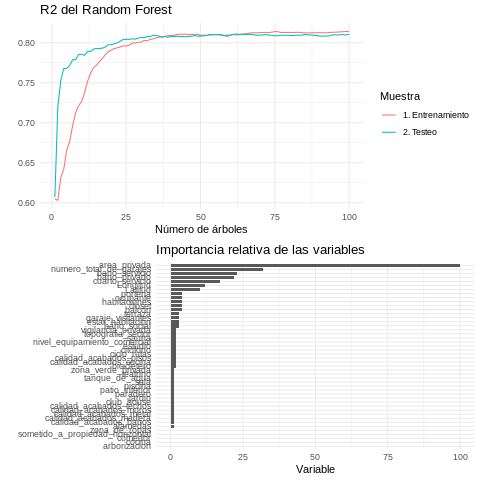

In [322]:
#########################
### Programación en R ###
#########################
%%R -i data_m
# Librerias
library(dplyr)
library(ggplot2)
library(gridExtra)
library(randomForest)
# Semilla
set.seed(1974)
# Parametrización
narboles <- 100
# Categóricas como factor
for (i in 5:47){
    data_m[,i] <- as.factor(data_m[,i])
}
data_p <- data_m
data_p <- data_p[,2:47]
data_m <- filter(data_m, !is.na(dur))
# Random Forest
sample_test <- sample((1:nrow(data_m)), round(nrow(data_m)/4, 0)) # Indicador de la muestra de testeo - toma el 25% de las observaciones
arbolf <- randomForest(x=data_m[-sample_test,2:47], y=data_m[-sample_test,]$dur,
                       xtest=data_m[sample_test,2:47], ytest=data_m[sample_test,]$dur,
                       ntree=narboles, keep.forest=T)
print(arbolf)
# Predicción
pred <- as.data.frame(round(predict(arbolf, data_p),0))
colnames(pred) <- c('dpred')
# Gráfica
rf_r2_e <- as.data.frame(cbind(seq(1,narboles), arbolf$rsq)); rf_r2_e$Muestra <- "1. Entrenamiento"
rf_r2_v <- as.data.frame(cbind(seq(1,narboles), arbolf$test$rsq)); rf_r2_v$Muestra <- "2. Testeo"
rf_r2 <- rbind(rf_r2_e, rf_r2_v)
colnames(rf_r2) <- c("arboles", "r2", "Muestra")
#
gt <- ggplot(rf_r2,
             aes(x=arboles, y=r2, group=Muestra, color=Muestra)) + 
             geom_line() + 
             theme_minimal() + 
             labs(title="R2 del Random Forest") +
             xlab("Número de árboles") +
             ylab("")
# Importancia
importancia <- as.data.frame(importance(arbolf))
importancia$variable <- rownames(importancia)
importancia$imp_rel <- round(100*(importancia$IncNodePurity/max(importancia$IncNodePurity)),0)
importancia <- importancia[order(-importancia$imp_rel), ]
#
gi <- ggplot(importancia, aes(x=reorder(variable, imp_rel), y=imp_rel)) + 
             geom_bar(stat="identity") +
             coord_flip() + 
             theme_minimal() + 
             labs(title="Importancia relativa de las variables") +
             xlab("") +
             ylab("Variable")
# Gráfico conjunto
grid.arrange(gt, gi, ncol=1)

## Resultados

In [323]:
%R -o rf_r2
rf_r2_py = rf_r2.copy()

In [324]:
%R -o importancia
importancia_py = importancia.copy()

El modelo parece tener un buen ajuste usando 100 árboles. El modelo logra explicar el 80% de la varianza del precio.

In [337]:
fig = px.line(rf_r2_py, x='arboles', y='r2', color='Muestra',
             template='plotly_white',
             title='Importancia relativa de las variables en la predicción del precio', labels={'r2':'R2', 'arboles':'Número de árboles'}, 
             width=700, height=500)
fig.show()

La variable más importante para predecir el precio fue el área de la vivienda

In [338]:
fig = px.bar(importancia_py.loc[importancia_py['imp_rel']>2, ], x='variable', y='imp_rel',
             template='plotly_white',
             title='Importancia relativa de las variables en la predicción del precio', labels={'variable':'Variable', 'imp_rel':'Porcentaje'}, 
             width=700, height=500)
fig.show()